## Fifa 2019 Oyuncu Kartları Analizi

### Veri Setini Tanıyalım

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv")
df=df.iloc[: , 1:]
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [5]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


### Fiyat Ön İşleme

In [9]:
df['Value'][:10]

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
5       €93M
6       €67M
7       €80M
8       €51M
9       €68M
Name: Value, dtype: object

In [10]:
df['Value']=df['Value'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Value'][:10]

0    110.5 1000000
1       77 1000000
2    118.5 1000000
3       72 1000000
4      102 1000000
5       93 1000000
6       67 1000000
7       80 1000000
8       51 1000000
9       68 1000000
Name: Value, dtype: object

In [11]:
df['Value']=df['Value'].str.split(' ',expand=True)[0].astype(float)*df['Value'].str.split(' ',expand=True)[1].astype(float)
df['Value'][:10]

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
5     93000000.0
6     67000000.0
7     80000000.0
8     51000000.0
9     68000000.0
Name: Value, dtype: float64

In [12]:
df['Value']=df['Value'].fillna(0).astype(np.float32)

In [13]:
df['Value'][:10]

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
5     93000000.0
6     67000000.0
7     80000000.0
8     51000000.0
9     68000000.0
Name: Value, dtype: float32

### Oyuncuların Pozisyon Dağılımları (Kategorik Dağılım)

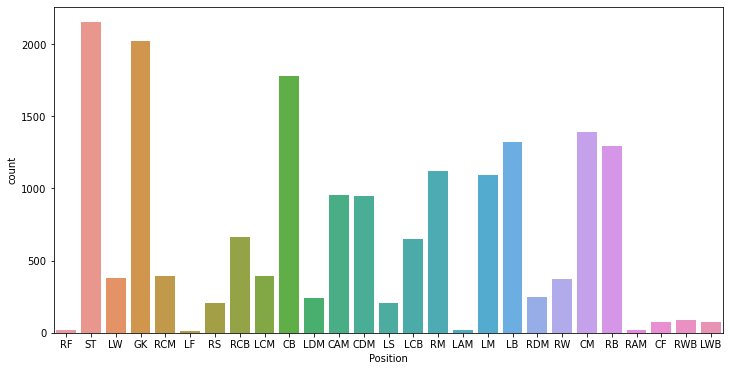

In [21]:
f,ax=plt.subplots(figsize=(12,6))
ax=sns.countplot(x=df["Position"])
ax.set_xlabel("Position")
plt.show()

### Oyuncuların Yaş Dağılımları ( Sayısal Dağılım) 

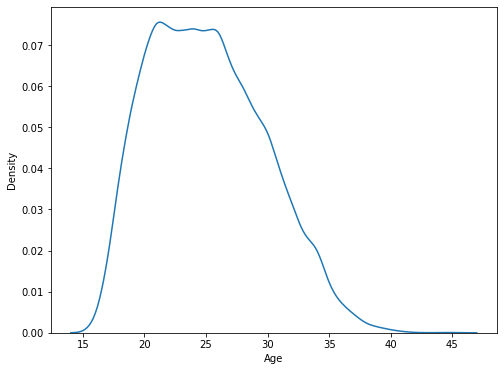

In [23]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.kdeplot(df['Age'])
ax.set_xlabel("Age")
plt.show()

### Oyuncuların Kullandıkları Ayak Bilgisinin Fiyata Etkisi

In [25]:
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

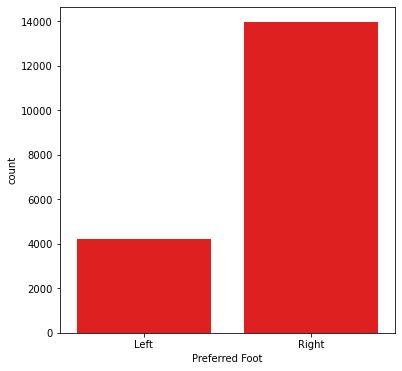

In [26]:
f,ax=plt.subplots(figsize=(6,6))
sns.countplot(x="Preferred Foot",data=df,color="r")
plt.show()

<AxesSubplot:xlabel='Preferred Foot', ylabel='Value'>

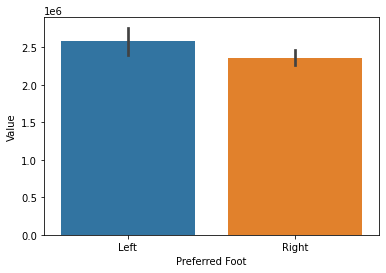

In [27]:
sns.barplot(x="Preferred Foot",y="Value",data=df)

In [28]:
df.groupby("Preferred Foot")['Value'].mean()

Preferred Foot
Left     2587498.25
Right    2364394.50
Name: Value, dtype: float32

### Oyuncuların Kullandıkları Ayak Bilgisinin ve Pozisyonun Fiyata Etkisi

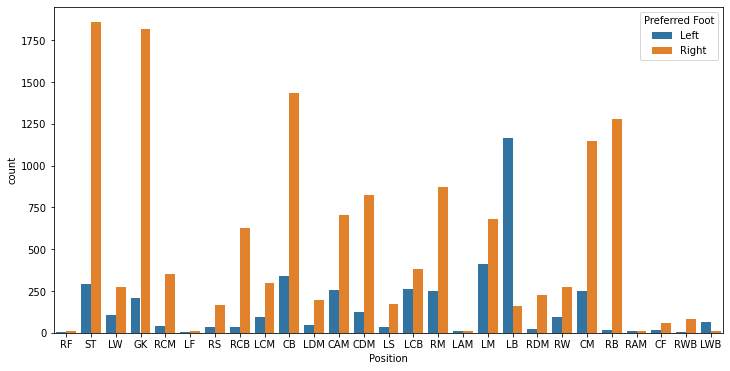

In [34]:
f,ax=plt.subplots(figsize=(12,6))
ax=sns.countplot(x="Position",hue="Preferred Foot",data=df)

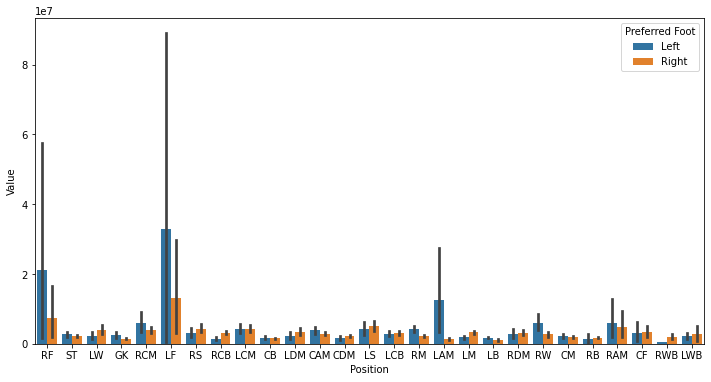

In [35]:
f,ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="Position",y="Value",hue="Preferred Foot",data=df)

### Uluslararası İtibar ve Oyuncu Potansiyel İlişkisi

In [39]:
df['International Reputation'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

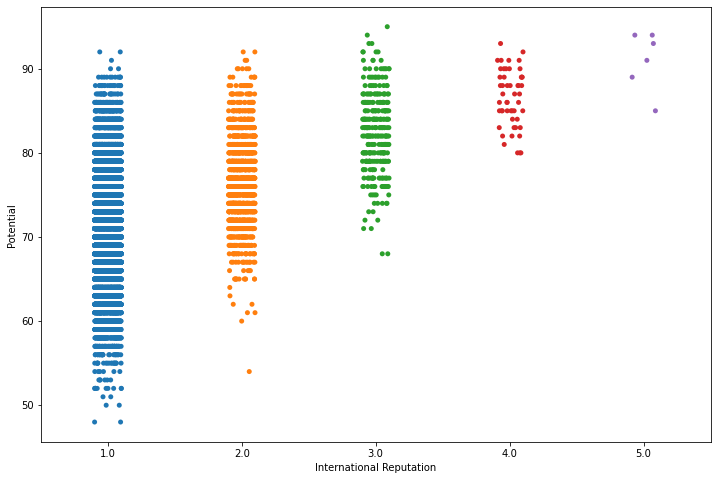

In [42]:
f,ax=plt.subplots(figsize=(12,8))
sns.stripplot(x="International Reputation",y="Potential",data=df)
plt.show()

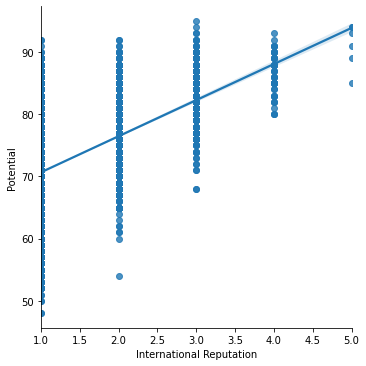

In [43]:
sns.lmplot(x="International Reputation",y="Potential",data=df)
plt.show()

### Uluslararası İtibar ile Oyuncu Potansiyeli- Kullandığı Ayak Bilgisi İlişkisi

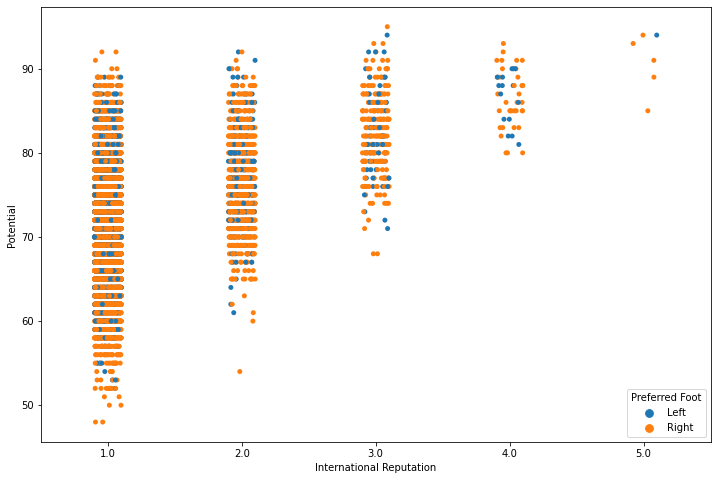

In [45]:
f,ax=plt.subplots(figsize=(12,8))
sns.stripplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=df)
plt.show()

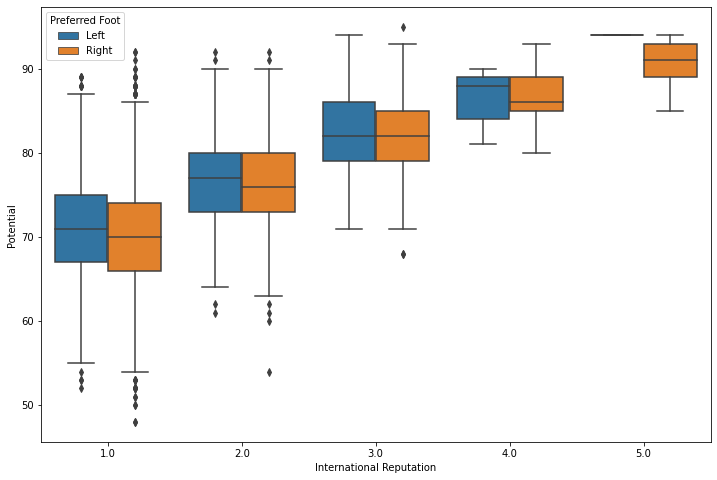

In [46]:
f,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=df)
plt.show()

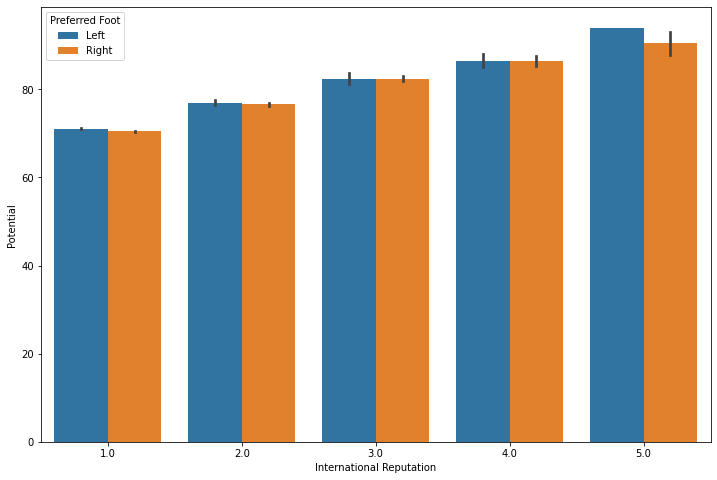

In [48]:
f,ax=plt.subplots(figsize=(12,8))
sns.barplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=df)
plt.show()

### Oyuncuların Potansiyelleri ve Güçleri Arasındaki İlişki

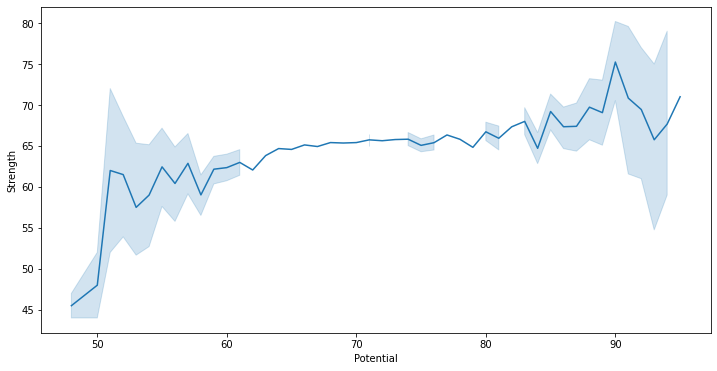

In [53]:
f,ax=plt.subplots(figsize=(12,6))
ax=sns.lineplot(x="Potential",y="Strength",data=df)
plt.show()

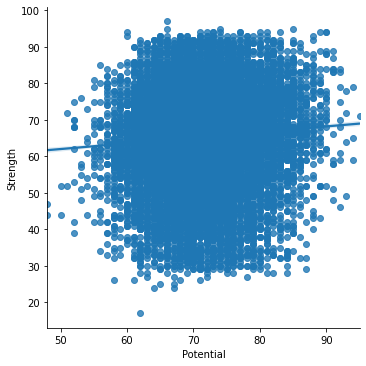

In [51]:
sns.lmplot(x="Potential",y="Strength",data=df)
plt.show()

### Oyuncuların Potansiyelleri ile Güçleri-Kullandıkları Ayak Bilgisi Arasındaki İlişki

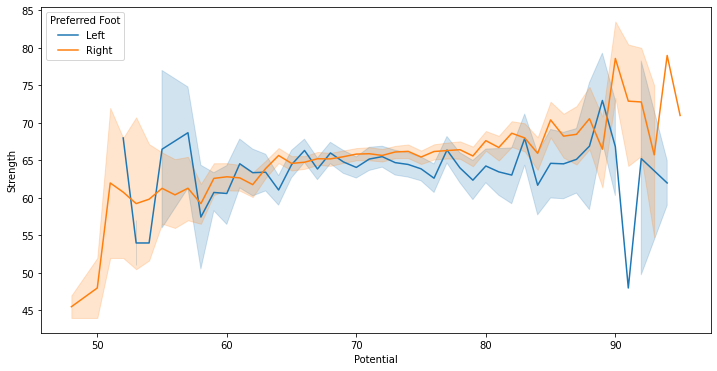

In [56]:
f,ax=plt.subplots(figsize=(12,6))
ax=sns.lineplot(x="Potential",y="Strength",hue="Preferred Foot",data=df)
plt.show()

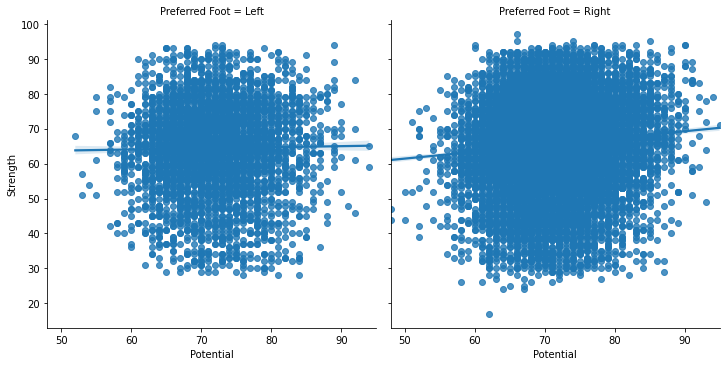

In [57]:
sns.lmplot(x="Potential",y="Strength",col="Preferred Foot",data=df)
plt.show()